In [1]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

## Malignancy: 

### Designed Features:

#### Radiologists Agreements

In [3]:
# read original dataset

score_df1 = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/Malignancy/machine_ratings/DF_Machine_mal_var_distance.csv')
score_df = score_df1[['Distance','Two_Agreement']]
#score_df = score_df1[['Score','Two_Agreement']]
groups = score_df.groupby('Two_Agreement').count().reset_index()
groups

,Two_Agreement,Distance
0,Full_High,427
1,Low_No,905


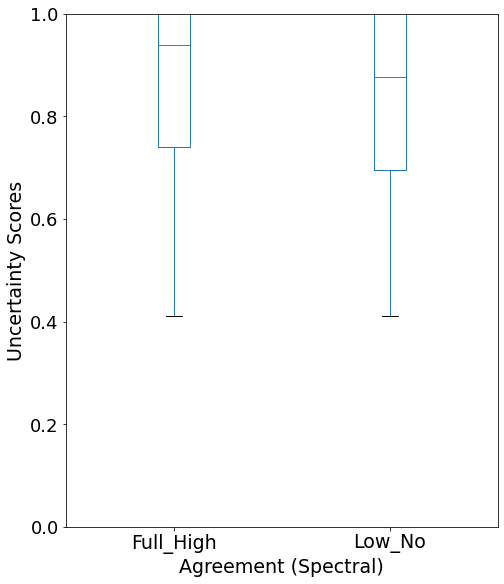

In [4]:
plt.rcParams["figure.figsize"] = [7.50, 9.50]
#plt.rcParams["figure.autolayout"] = True
#df.plot(figsize=(20,20))

axes = score_df1.boxplot(by='Two_Agreement',column =['Distance'], showmeans=True, showfliers=True, grid= False)
#axes = score_df1.boxplot(by='Two_Agreement',column =['Score'], showmeans=True, showfliers=True, grid= False)
axes.set_title('')
axes.set_title('')
plt.title('')
plt.suptitle('')


#plt.xlabel(" Agreement (Variance) ", fontdict={'fontsize':19})
#plt.ylabel("Distance from Centroid", fontdict={'fontsize':19})

plt.ylim([0.0, 1.0])
plt.ylabel("Uncertainty Scores", fontdict={'fontsize':19})
#plt.xlabel(" Agreement (K-mean) ", fontdict={'fontsize':19})
plt.xlabel(" Agreement (Spectral) ", fontdict={'fontsize':19})
plt.xticks([1, 2], ['Full_High', 'Low_No'], fontdict={'fontsize':19})
plt.yticks(fontsize=18)
plt.show()

In [5]:
full_Hi = score_df.loc[score_df['Two_Agreement'] == 'Full_High']
#full_Hi['Score']
low_no = score_df.loc[score_df['Two_Agreement'] == 'Low_No']
m_fh = np.mean(full_Hi)
m_ln = np.mean(low_no)
# Performing the paired sample t-test
#t, p = ttest_ind(list(full_Hi['Score']), list(low_no['Score']), equal_var=False)
t, p = ttest_ind(list(full_Hi['Distance']), list(low_no['Distance']), equal_var=False)
alpha = 0.05
# conclusion
if p < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')
print("ttest_ind:            t = %g  p = %g" % (t, p))
print("mean of full_hi and mean of low_no:  m_fh = %g  m_ln = %g" % (m_fh, m_ln))

Do not Reject Null Hypothesis (No significant difference between two samples)
ttest_ind:            t = 0.51184  p = 0.608874
mean of full_hi and mean of low_no:  m_fh = 1.05066  m_ln = 1.0364


/Users/amalalmansour/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [6]:
# perform mann whitney test
#stat, p_value = mannwhitneyu(list(full_Hi['Score']), list(low_no['Score']))
stat, p_value = mannwhitneyu(list(full_Hi['Distance']), list(low_no['Distance']))
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')
# median 
med_fh = full_Hi.median()
med_ln = low_no.median()
print("mean of full_hi and mean of low_no:  med_fh = %g  med_ln = %g" % (med_fh, med_ln))

Statistics=209371.00, p=0.01
Reject Null Hypothesis (Significant difference between two samples)
mean of full_hi and mean of low_no:  med_fh = 0.938522  med_ln = 0.875963


<ipython-input-6-8ed717409baf>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med_fh = full_Hi.median()
<ipython-input-6-8ed717409baf>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med_ln = low_no.median()


In [44]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_df1['Score'], groups=score_df1['Agreement'], alpha=0.05)
#m_comp = pairwise_tukeyhsd(endog=score_df1['Distance'], groups=score_df1['Agreement'], alpha=0.05)
print(m_comp)

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
          group1                     group2           meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------
    All Radiologists Agree High Radiologist Agreement  -0.1032 0.0174 -0.1934  -0.013   True
    All Radiologists Agree  Low Radiologist Agreement  -0.1247 0.0012  -0.211 -0.0383   True
    All Radiologists Agree   No Radiologist Agreement  -0.1245 0.0074 -0.2243 -0.0247   True
High Radiologist Agreement  Low Radiologist Agreement  -0.0215 0.5751 -0.0652  0.0222  False
High Radiologist Agreement   No Radiologist Agreement  -0.0214 0.8213 -0.0878  0.0451  False
 Low Radiologist Agreement   No Radiologist Agreement   0.0001    0.9  -0.061  0.0613  False
--------------------------------------------------------------------------------------------


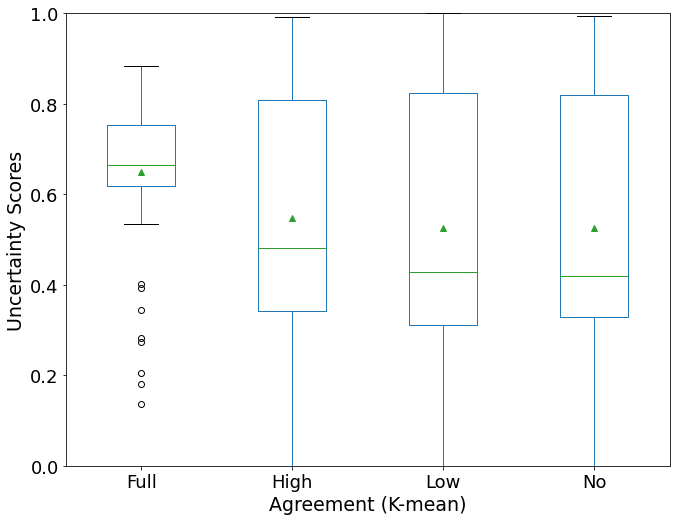

In [45]:
plt.rcParams["figure.figsize"] = [9.50, 7.50]
plt.rcParams["figure.autolayout"] = True
#df.plot(figsize=(20,20))

#axes = score_df1.boxplot(by='Agreement',column =['Distance'], showmeans=True, showfliers=True, grid= False)
axes = score_df1.boxplot(by='Agreement',column =['Score'], showmeans=True, showfliers=True, grid= False)
axes.set_title('')
plt.title('')
plt.suptitle('')

#plt.ylabel("Distance from the Centroid", fontdict={'fontsize':19})
#plt.xlabel(" Agreement (Variance) ", fontdict={'fontsize':19})

plt.ylim([0.0, 1.0])
plt.ylabel("Uncertainty Scores", fontdict={'fontsize':19})
#plt.xlabel(" Agreement (Spectral) ", fontdict={'fontsize':19})
#plt.xlabel(" Agreement (K-mean) ", fontdict={'fontsize':19})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks([1, 2, 3,4],['Full', 'High', 'Low', 'No'])
plt.show()

In [46]:
#m2 = score_df1.groupby(['Agreement'])['Distance'].mean().values
m2 = score_df1.groupby(['Agreement'])['Score'].mean().values
print(m2)

[0.6497038  0.54653834 0.52503753 0.52518568]


#### Labels:

In [23]:
# read original dataset
#score_df2 = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/Malignancy/DF_mal_max_scores.csv')
score_df2 = score_df1[['Score','Spiculation']]
groups = score_df2.groupby('Spiculation').count().reset_index()

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_df1['Score'], groups=score_df1['Spiculation'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.1156  0.001  0.0688  0.1625   True
     0      2  -0.0526 0.0014 -0.0894 -0.0159   True
     0      3   0.0055    0.9 -0.0232  0.0342  False
     1      2  -0.1683  0.001 -0.2147 -0.1218   True
     1      3  -0.1101  0.001 -0.1506 -0.0697   True
     2      3   0.0582  0.001  0.0301  0.0862   True
----------------------------------------------------


### CNN:

### Radiologists Agreements:

In [7]:
# read original dataset
score_CNN = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/Malignancy/CNN_mal_var_distance.csv')
score_CNN1 = score_CNN[['Distance','Two_Agreement']]
#score_df

FileNotFoundError: [Errno 2] No such file or directory: '/Users/amalalmansour/Desktop/New_Images/Malignancy/CNN_mal_var_distance.csv'

In [ ]:
groups = score_CNN1.groupby('Two_Agreement').count().reset_index()
groups

In [ ]:
full_Hi = score_CNN1.loc[score_CNN1['Two_Agreement'] == 'Full_High']
#full_Hi['Score']
low_no = score_CNN1.loc[score_CNN1['Two_Agreement'] == 'Low_No']

In [ ]:
m_fh = np.mean(full_Hi)
m_ln = np.mean(low_no)
# Performing the paired sample t-test
t, p = ttest_ind(list(full_Hi['Distance']), list(low_no['Distance']), equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))
print("mean of full_hi and mean of low_no:  m_fh = %g  m_ln = %g" % (m_fh, m_ln))

In [ ]:
# perform mann whitney test
stat, p_value = mannwhitneyu(list(full_Hi['Distance']), list(low_no['Distance']))
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')
# median 
med_fh = full_Hi.median()
med_ln = low_no.median()
print("mean of full_hi and mean of low_no:  med_fh = %g  med_ln = %g" % (med_fh, med_ln))

In [ ]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_CNN['Distance'], groups=score_CNN['Agreement'], alpha=0.05)
print(m_comp)
# The means are different between high & low.

### Labels:

In [ ]:
# read original dataset
'''score_CNN_label1 = score_CNN[['Score','Spiculation']]
groups = score_CNN_label1.groupby('Spiculation').count().reset_index()
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_CNN['Score'], groups=score_CNN['Spiculation'], alpha=0.05)
print(m_comp)'''

### SCNN:

In [ ]:
# read original dataset
score_SCNN = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/Malignancy/SCNN_mal_var_distance.csv')
score_SCNN1 = score_SCNN[['Distance','Two_Agreement']]
groups = score_SCNN1.groupby('Two_Agreement').count().reset_index()
groups

In [ ]:
full_Hi = score_SCNN1.loc[score_SCNN1['Two_Agreement'] == 'Full_High']
#full_Hi['Score']
low_no = score_SCNN1.loc[score_SCNN1['Two_Agreement'] == 'Low_No']
m_fh = np.mean(full_Hi)
m_ln = np.mean(low_no)
# Performing the paired sample t-test
t, p = ttest_ind(list(full_Hi['Distance']), list(low_no['Distance']), equal_var=False)
# Level of significance
alpha = 0.05
# conclusion
if p < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')
print("ttest_ind:            t = %g  p = %g" % (t, p))
print("mean of full_hi and mean of low_no:  m_fh = %g  m_ln = %g" % (m_fh, m_ln))

In [ ]:
# perform mann whitney test
stat, p_value = mannwhitneyu(list(full_Hi['Distance']), list(low_no['Distance']))
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')
# median 
med_fh = full_Hi.median()
med_ln = low_no.median()
print("mean of full_hi and mean of low_no:  med_fh = %g  med_ln = %g" % (med_fh, med_ln))

In [ ]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_SCNN['Distance'], groups=score_SCNN['Agreement'], alpha=0.05)
print(m_comp) 
#### The means are equal in SCNN. 

In [ ]:
# perform multiple pairwise comparison (Tukey HSD)
#m_comp = pairwise_tukeyhsd(endog=score_SCNN['Score'], groups=score_SCNN['Spiculation'], alpha=0.05)
#print(m_comp) 
#### The means are equal in SCNN. 

### Sigma VAE: 

In [ ]:
# read original dataset
score_VAE = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/Malignancy/AE_mal_var_distance.csv')
score_VAE1 = score_VAE[['Distance','Two_Agreement']]
groups = score_VAE1.groupby('Two_Agreement').count().reset_index()
groups

In [ ]:
full_Hi = score_VAE1.loc[score_VAE1['Two_Agreement'] == 'Full_High']
#full_Hi['Score']
low_no = score_VAE1.loc[score_VAE1['Two_Agreement'] == 'Low_No']
m_fh = np.mean(full_Hi)
m_ln = np.mean(low_no)
# Performing the paired sample t-test
t, p = ttest_ind(list(full_Hi['Distance']), list(low_no['Distance']), equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))
print("mean of full_hi and mean of low_no:  m_fh = %g  m_ln = %g" % (m_fh, m_ln))

In [ ]:
# perform mann whitney test
stat, p_value = mannwhitneyu(list(full_Hi['Distance']), list(low_no['Distance']))
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')
# median 
med_fh = full_Hi.median()
med_ln = low_no.median()
print("mean of full_hi and mean of low_no:  med_fh = %g  med_ln = %g" % (med_fh, med_ln))

In [ ]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_VAE['Distance'], groups=score_VAE['Agreement'], alpha=0.05)
print(m_comp) 
#### The means are equal between low & no in VAE. 

In [ ]:
# perform multiple pairwise comparison (Tukey HSD)
#m_comp = pairwise_tukeyhsd(endog=score_VAE['Score'], groups=score_VAE['Spiculation'], alpha=0.05)
#print(m_comp) 

# ---------------------------------- 

## Spiculation:

### Designed Features:

#### Radiologists' Agreements

In [ ]:
# read original dataset
score_df3 = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/Spiculation/DF_spic_var_distance.csv')
score_df33 = score_df3[['Distance','Two_Agreement']]
groups = score_df33.groupby('Two_Agreement').count().reset_index()
groups

In [ ]:
full_Hi = score_df33.loc[score_df33['Two_Agreement'] == 'Full_High']
#full_Hi['Score']
low_no = score_df33.loc[score_df33['Two_Agreement'] == 'Low_No']
m_fh = np.mean(full_Hi)
m_ln = np.mean(low_no)
# Performing the paired sample t-test
t, p = ttest_ind(list(full_Hi['Distance']), list(low_no['Distance']), equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))
print("mean of full_hi and mean of low_no:  m_fh = %g  m_ln = %g" % (m_fh, m_ln))

In [ ]:
# perform mann whitney test
stat, p_value = mannwhitneyu(list(full_Hi['Distance']), list(low_no['Distance']))
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')
# median 
med_fh = full_Hi.median()
med_ln = low_no.median()
print("mean of full_hi and mean of low_no:  med_fh = %g  med_ln = %g" % (med_fh, med_ln))

In [ ]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_df3['Distance'], groups=score_df3['Agreement'], alpha=0.05)
print(m_comp)

In [ ]:
# perform multiple pairwise comparison (Tukey HSD)
#m_comp = pairwise_tukeyhsd(endog=score_df3['Score'], groups=score_df3['Spiculation'], alpha=0.05)
#print(m_comp)
# All means are different

### CNN:

In [ ]:
# read original dataset
score_CNN_Spic = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/Spiculation/CNN_spic_var_distance.csv')
score_CNN_Spic1 = score_CNN_Spic[['Distance','Two_Agreement']]
groups = score_CNN_Spic1.groupby('Two_Agreement').count().reset_index()
groups

In [ ]:
full_Hi = score_CNN_Spic1.loc[score_CNN_Spic1['Two_Agreement'] == 'Full_High']
#full_Hi['Score']
low_no = score_CNN_Spic1.loc[score_CNN_Spic1['Two_Agreement'] == 'Low_No']
m_fh = np.mean(full_Hi)
m_ln = np.mean(low_no)
# Performing the paired sample t-test
t, p = ttest_ind(list(full_Hi['Distance']), list(low_no['Distance']), equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))
print("mean of full_hi and mean of low_no:  m_fh = %g  m_ln = %g" % (m_fh, m_ln))

In [ ]:
# perform mann whitney test
stat, p_value = mannwhitneyu(list(full_Hi['Distance']), list(low_no['Distance']))
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')
# median 
med_fh = full_Hi.median()
med_ln = low_no.median()
print("mean of full_hi and mean of low_no:  med_fh = %g  med_ln = %g" % (med_fh, med_ln))

In [ ]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_CNN_Spic['Distance'], groups=score_CNN_Spic['Agreement'], alpha=0.05)
print(m_comp)

In [ ]:
# perform multiple pairwise comparison (Tukey HSD)
#m_comp = pairwise_tukeyhsd(endog=score_CNN_Spic['Score'], groups=score_CNN_Spic['Spiculation'], alpha=0.05)
#print(m_comp)

### SCNN:

In [ ]:
# read original dataset
score_SCNN_spic = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/Spiculation/SCNN_spic_var_distance.csv')
score_SCNN_spic1 = score_SCNN_spic[['Distance','Two_Agreement']]
groups = score_SCNN_spic1.groupby('Two_Agreement').count().reset_index()
groups

In [ ]:
full_Hi = score_SCNN_spic1.loc[score_SCNN_spic1['Two_Agreement'] == 'Full_High']
#full_Hi['Score']
low_no = score_SCNN_spic1.loc[score_SCNN_spic1['Two_Agreement'] == 'Low_No']
m_fh = np.mean(full_Hi)
m_ln = np.mean(low_no)
# Performing the paired sample t-test
t, p = ttest_ind(list(full_Hi['Distance']), list(low_no['Distance']), equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))
print("mean of full_hi and mean of low_no:  m_fh = %g  m_ln = %g" % (m_fh, m_ln))

In [ ]:
# perform mann whitney test
stat, p_value = mannwhitneyu(list(full_Hi['Distance']), list(low_no['Distance']))
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')
# median 
med_fh = full_Hi.median()
med_ln = low_no.median()
print("mean of full_hi and mean of low_no:  med_fh = %g  med_ln = %g" % (med_fh, med_ln))

In [ ]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_SCNN_spic['Distance'], groups=score_SCNN_spic['Agreement'], alpha=0.05)
print(m_comp)

In [ ]:
# perform multiple pairwise comparison (Tukey HSD)
#m_comp = pairwise_tukeyhsd(endog=score_SCNN_spic['Score'], groups=score_SCNN_spic['Spiculation'], alpha=0.05)
#print(m_comp)

### Sigma VAE:

In [ ]:
# read original dataset
score_VAE_Spic = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/Spiculation/AE_spic_var_distance.csv')
score_VAE_Spic1 = score_VAE_Spic[['Distance','Two_Agreement']]
groups = score_VAE_Spic1.groupby('Two_Agreement').count().reset_index()
groups

In [ ]:
full_Hi = score_VAE_Spic1.loc[score_VAE_Spic1['Two_Agreement'] == 'Full_High']
#full_Hi['Score']
low_no = score_VAE_Spic1.loc[score_VAE_Spic1['Two_Agreement'] == 'Low_No']
m_fh = np.mean(full_Hi)
m_ln = np.mean(low_no)
# Performing the paired sample t-test
t, p = ttest_ind(list(full_Hi['Distance']), list(low_no['Distance']), equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))
print("mean of full_hi and mean of low_no:  m_fh = %g  m_ln = %g" % (m_fh, m_ln))

In [ ]:
# perform mann whitney test
stat, p_value = mannwhitneyu(list(full_Hi['Distance']), list(low_no['Distance']))
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')
# median 
med_fh = full_Hi.median()
med_ln = low_no.median()
print("mean of full_hi and mean of low_no:  med_fh = %g  med_ln = %g" % (med_fh, med_ln))

In [ ]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_VAE_Spic['Distance'], groups=score_VAE_Spic['Agreement'], alpha=0.05)
print(m_comp)

In [ ]:
# perform multiple pairwise comparison (Tukey HSD)
#m_comp = pairwise_tukeyhsd(endog=score_VAE_Spic['Score'], groups=score_VAE_Spic['Spiculation'], alpha=0.05)
#print(m_comp)